In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['rapl'])
from common import *
from plotcommon import *
from cla_util import *
from rayleigh_diagnostics import GridInfo

In [2]:
os.listdir('data')

['Point_Probes_trace-11900001_11900100.pkl',
 'AZ_Avgs_trace-11900001_11900100.pkl',
 'G_Avgs_trace_nquadlat4_nquadr4-11900001_11900100.pkl']

In [3]:
# get point probes data
di = get_dict('data/Point_Probes_trace-11900001_11900100.pkl')
vals = di['vals']
times = di['times']
iters = di['iters']
lut = di['lut']
rvals = di['rvals']
thetavals = di['thetavals']
phivals = di['phivals']

# get grid info
di_grid = get_grid_info('.')
rr = di_grid['rr']
tt = di_grid['tt']
phi = di_grid['phi']
tt_lat = di_grid['tt_lat']
lons = di_grid['lons']

irvals = inds_from_vals(rr, rvals)
ithetavals = inds_from_vals(tt, thetavals)
iphivals = inds_from_vals(phi, phivals)

print ('irvals = ', irvals)
print ('ithetavals = ', ithetavals)
print ('iphivals = ', iphivals)

print ('rvals/rsun = ', rr[irvals]/rsun)
print ('tt_lat = ', tt_lat[ithetavals])
print ('lons = ', lons[iphivals])

print ('shape(vals) = ', np.shape(vals))
print ('nphi, ntheta, nr = ', di_grid['nphi'], di_grid['nt'], di_grid['nr'])

irvals =  [ 11  18  26  34  42  53  78  88  92  95  99 103 113 138 149 157 165 173
 180]
ithetavals =  [ 10  24  48  72  95 119 143 167 181]
iphivals =  [  0  48  96 144 191 239 287 335]
rvals/rsun =  [0.09892972 0.09642601 0.09262591 0.08838308 0.08434344 0.08023073
 0.07617349 0.07184135 0.0697813  0.06818479 0.06605311 0.06399306
 0.05966092 0.05560368 0.05149097 0.04745134 0.0432085  0.0394084
 0.0369047 ]
tt_lat =  [-79.94696225 -66.85669072 -44.41539505 -21.97394799  -0.46753089
  21.97394799  44.41539505  66.85669072  79.94696225]
lons =  [  0.      45.      90.     135.     179.0625 224.0625 269.0625 314.0625]
shape(vals) =  (100, 8, 9, 19, 89)
nphi, ntheta, nr =  384 192 192


In [4]:
np.where(lut !=4000)

(array([ 201,  202,  203,  402,  403,  404,  701,  801,  802,  803, 1102,
        1103, 1104, 1201, 1202, 1203, 1210, 1211, 1212, 1216, 1219, 1220,
        1221, 1228, 1229, 1230, 1237, 1238, 1239, 1248, 1249, 1250, 1401,
        1402, 1406, 1421, 1434, 1435, 1436, 1601, 1602, 1603, 1604, 1605,
        1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1801,
        1802, 1803, 1804, 1805, 1806, 1819, 1822, 1901, 1904, 1907, 1910,
        1916, 2019, 2025, 2026, 2027, 2043, 2044, 2045, 2201, 2202, 2203,
        2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214,
        2215]),)

In [5]:
prot = compute_Prot('.')
t = times/prot

In [6]:
np.diff(times)

array([90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248565,
       90.7248565, 90.7248565, 90.7248565, 90.7248565, 90.7248

In [7]:
# thermo state
eq = get_eq('.')

In [8]:
iir0, iit0, iiphi0 = 0, 5, 3

ir0, it0, iphi0 = irvals[iir0], ithetavals[iit0], iphivals[iiphi0]

print ("r/rsun = ", rvals[iir0]/rsun)
print ("lat = ", tt_lat[it0])
print ("lon = ", lons[iphi0])

lhs = vals[:, iiphi0, iit0, iir0, lut[801]]
rhs_exp = vals[:, iiphi0, iit0, iir0, lut[1604]]
rhs_imp = vals[:, iiphi0, iit0, iir0, lut[1605]]

r/rsun =  0.09892971548281347
lat =  21.97394799023564
lon =  135.0


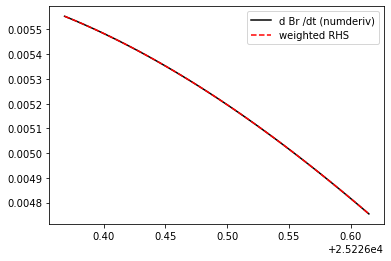

In [9]:
# compare two forces

# discrete time derivative (LHS)
dlhs = lhs[2:] - lhs[1:-1]
dt = times[2:] - times[1:-1]
dt_old = times[1:-1] - times[:-2]
lhs_r = dlhsdt = dlhs/dt

# RHS (some of source/sink terms)
rhs_r = rhs_weighted = 0.5*(rhs_imp[2:] + rhs_imp[1:-1]) + rhs_exp[1:-1] +\
    0.5*(dt/dt_old)*(rhs_exp[1:-1] - rhs_exp[:-2])

plt.plot(t[2:], dlhsdt, 'k', label='d Br /dt (numderiv)')
plt.plot(t[2:], rhs_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

In [10]:
# well that looks pretty good!

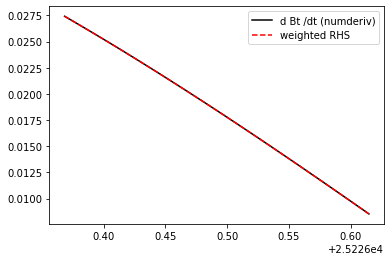

In [11]:
lhs = vals[:, iiphi0, iit0, iir0, lut[802]]
rhs_exp = vals[:, iiphi0, iit0, iir0, lut[1609]]
rhs_imp = vals[:, iiphi0, iit0, iir0, lut[1610]]

dlhs = lhs[2:] - lhs[1:-1]
dt = times[2:] - times[1:-1]
dt_old = times[1:-1] - times[:-2]
lhs_t = dlhsdt = dlhs/dt

rhs_t = rhs_weighted = 0.5*(rhs_imp[2:] + rhs_imp[1:-1]) + rhs_exp[1:-1] +\
    0.5*(dt/dt_old)*(rhs_exp[1:-1] - rhs_exp[:-2])

plt.plot(t[2:], dlhsdt, 'k', label='d Bt /dt (numderiv)')
plt.plot(t[2:], rhs_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

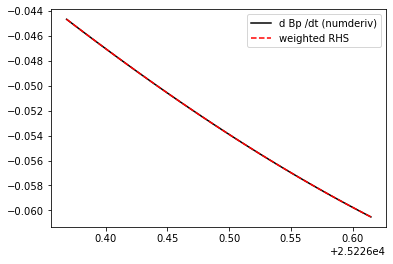

In [12]:
lhs = vals[:, iiphi0, iit0, iir0, lut[803]]
rhs_exp = vals[:, iiphi0, iit0, iir0, lut[1614]]
rhs_imp = vals[:, iiphi0, iit0, iir0, lut[1615]]

dlhs = lhs[2:] - lhs[1:-1]
dt = times[2:] - times[1:-1]
dt_old = times[1:-1] - times[:-2]
lhs_p = dlhsdt = dlhs/dt

rhs_p = rhs_weighted = 0.5*(rhs_imp[2:] + rhs_imp[1:-1]) + rhs_exp[1:-1] +\
    0.5*(dt/dt_old)*(rhs_exp[1:-1] - rhs_exp[:-2])

plt.plot(t[2:], dlhsdt, 'k', label='d Bp /dt (numderiv)')
plt.plot(t[2:], rhs_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

In [13]:
# check numerical errors in the momentum equation
print ("err ind r = ", np.std(lhs_r - rhs_r)/np.std(lhs_r))
print ("err ind t = ", np.std(lhs_t - rhs_t)/np.std(lhs_t))
print ("err ind p = ", np.std(lhs_p - rhs_p)/np.std(lhs_p))

err ind r =  2.3972386335787903e-06
err ind t =  1.0498663109763853e-06
err ind p =  1.801789652307043e-05


In [14]:
# all good in three domains